In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import seaborn
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('updated_pollution_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [9]:
df.drop_duplicates(keep='first',inplace=True)
df.isnull().any()

Temperature                      False
Humidity                         False
PM2.5                            False
PM10                             False
NO2                              False
SO2                              False
CO                               False
Proximity_to_Industrial_Areas    False
Population_Density               False
Air Quality                      False
dtype: bool

Dataset nema duplikata ni nedostajućih vrednosti

### Description of parameters
- Temperature (°C): Average temperature of the region.
- Humidity (%): Relative humidity recorded in the region.
- PM2.5 Concentration (µg/m³): Fine particulate matter levels.
- PM10 Concentration (µg/m³): Coarse particulate matter levels.
- NO2 Concentration (ppb): Nitrogen dioxide levels.
- SO2 Concentration (ppb): Sulfur dioxide levels.
- CO Concentration (ppm): Carbon monoxide levels.
- Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
- Population Density (people/km²): Number of people per square kilometer in the region
### Air Quality Levels
* Good: Clean air with low pollution levels.
* Moderate: Acceptable air quality but with some pollutants present.
* Poor: Noticeable pollution that may cause health issues for sensitive groups.
* Hazardous: Highly polluted air posing serious health risks to the population.

In [10]:
encoder = LabelEncoder()
df['Air Quality'] = encoder.fit_transform(df['Air Quality'])
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


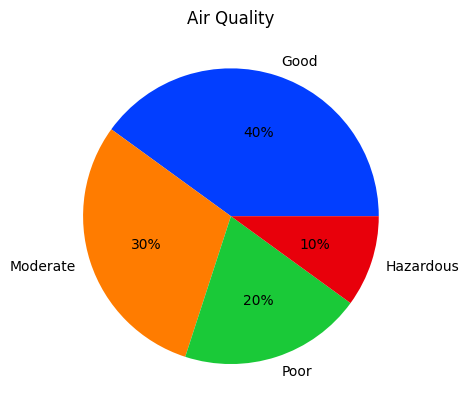

In [11]:
air_quality=df['Air Quality'].value_counts()
palette_color = seaborn.color_palette('bright') #Seaborn paleta boja 
plt.pie(air_quality.values, labels=encoder.inverse_transform(air_quality.index), colors=palette_color, autopct='%.0f%%')
plt.title("Air Quality") 
plt.show() 

<Axes: >

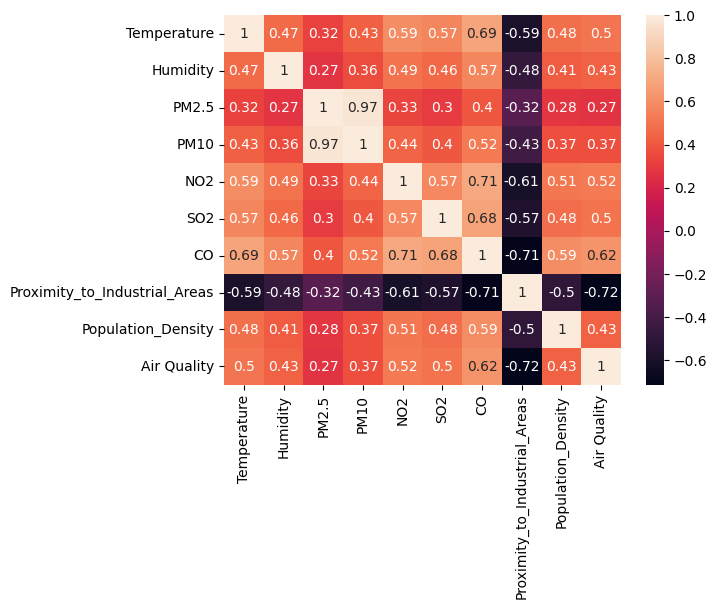

In [12]:
correlation=df.corr()
seaborn.heatmap(correlation,annot=True)

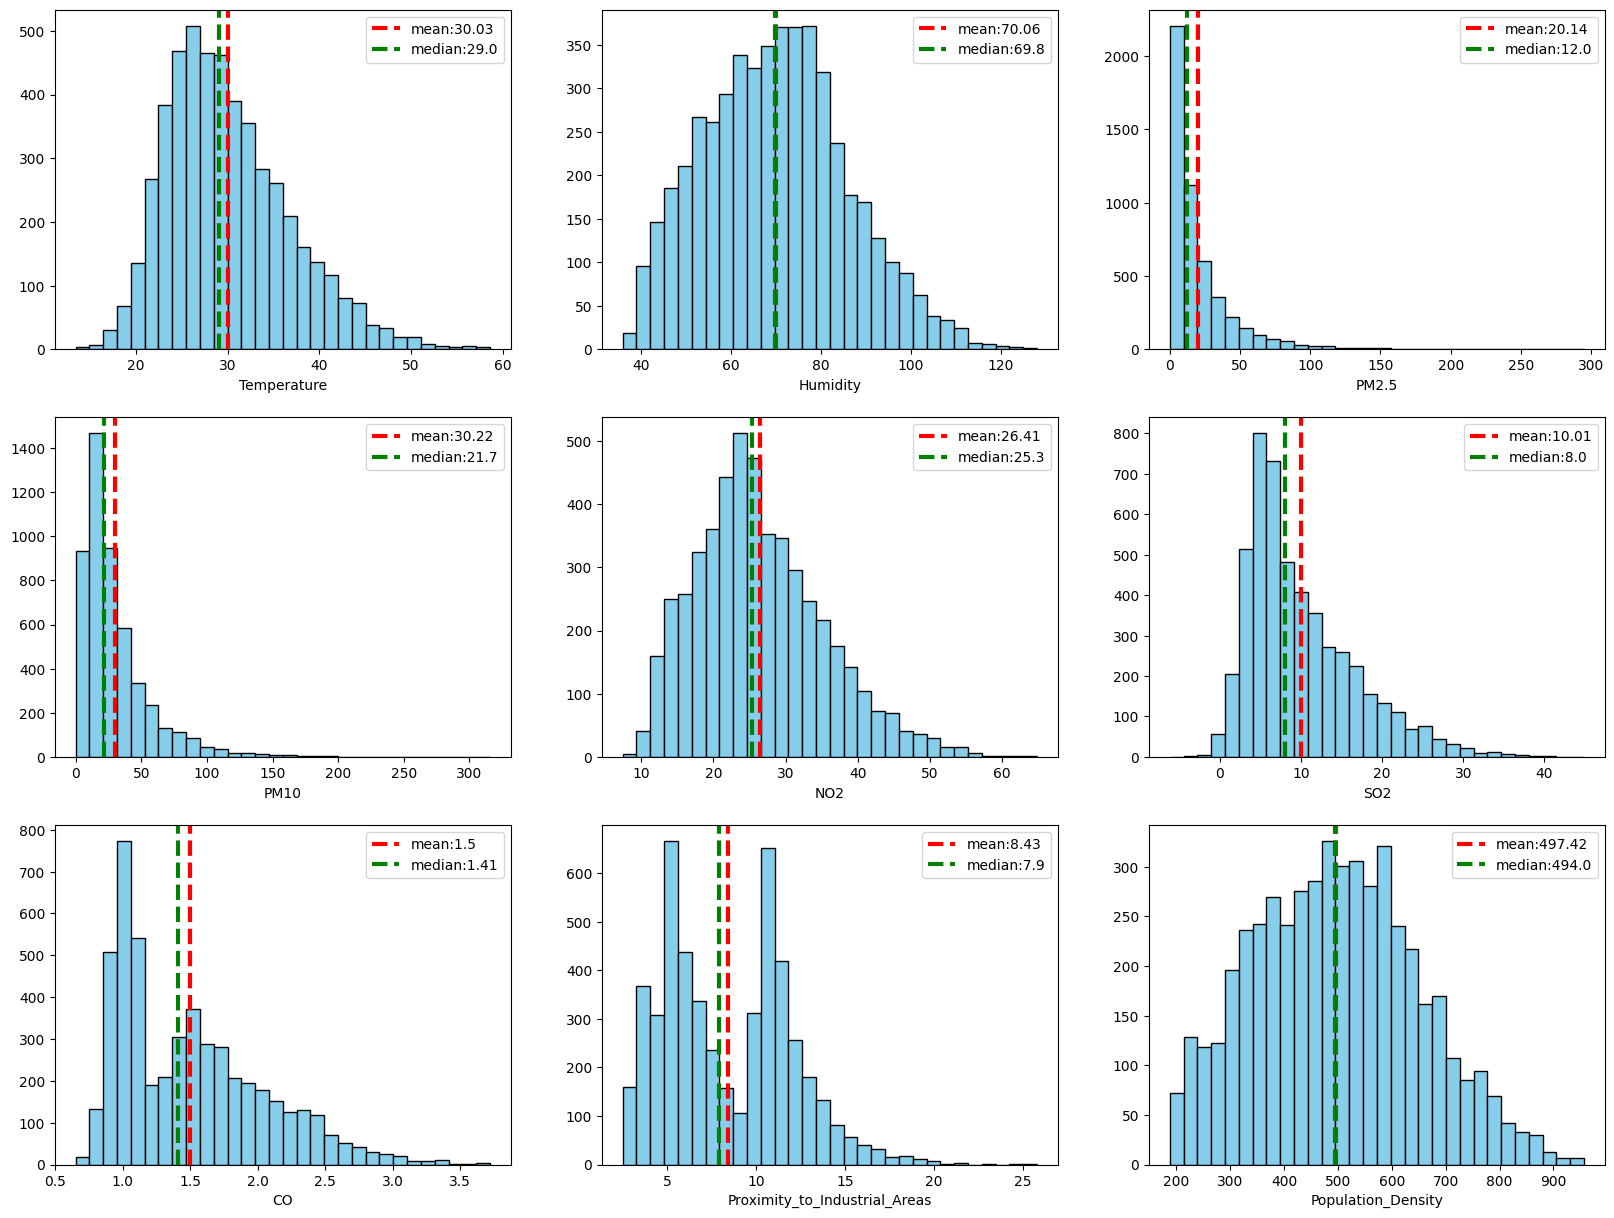

In [13]:
df_simpl=df.drop(columns='Air Quality')
plt.figure(figsize=(20,15))
for ind,col in enumerate(df_simpl.columns):
    plt.subplot(3,3,ind+1)
    plt.hist(df_simpl[col], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.xlabel(col)
    plt.legend([f'mean:{np.round(df[col].mean(),2)}',f'median:{np.round(df[col].median(),2)}'])
plt.show()

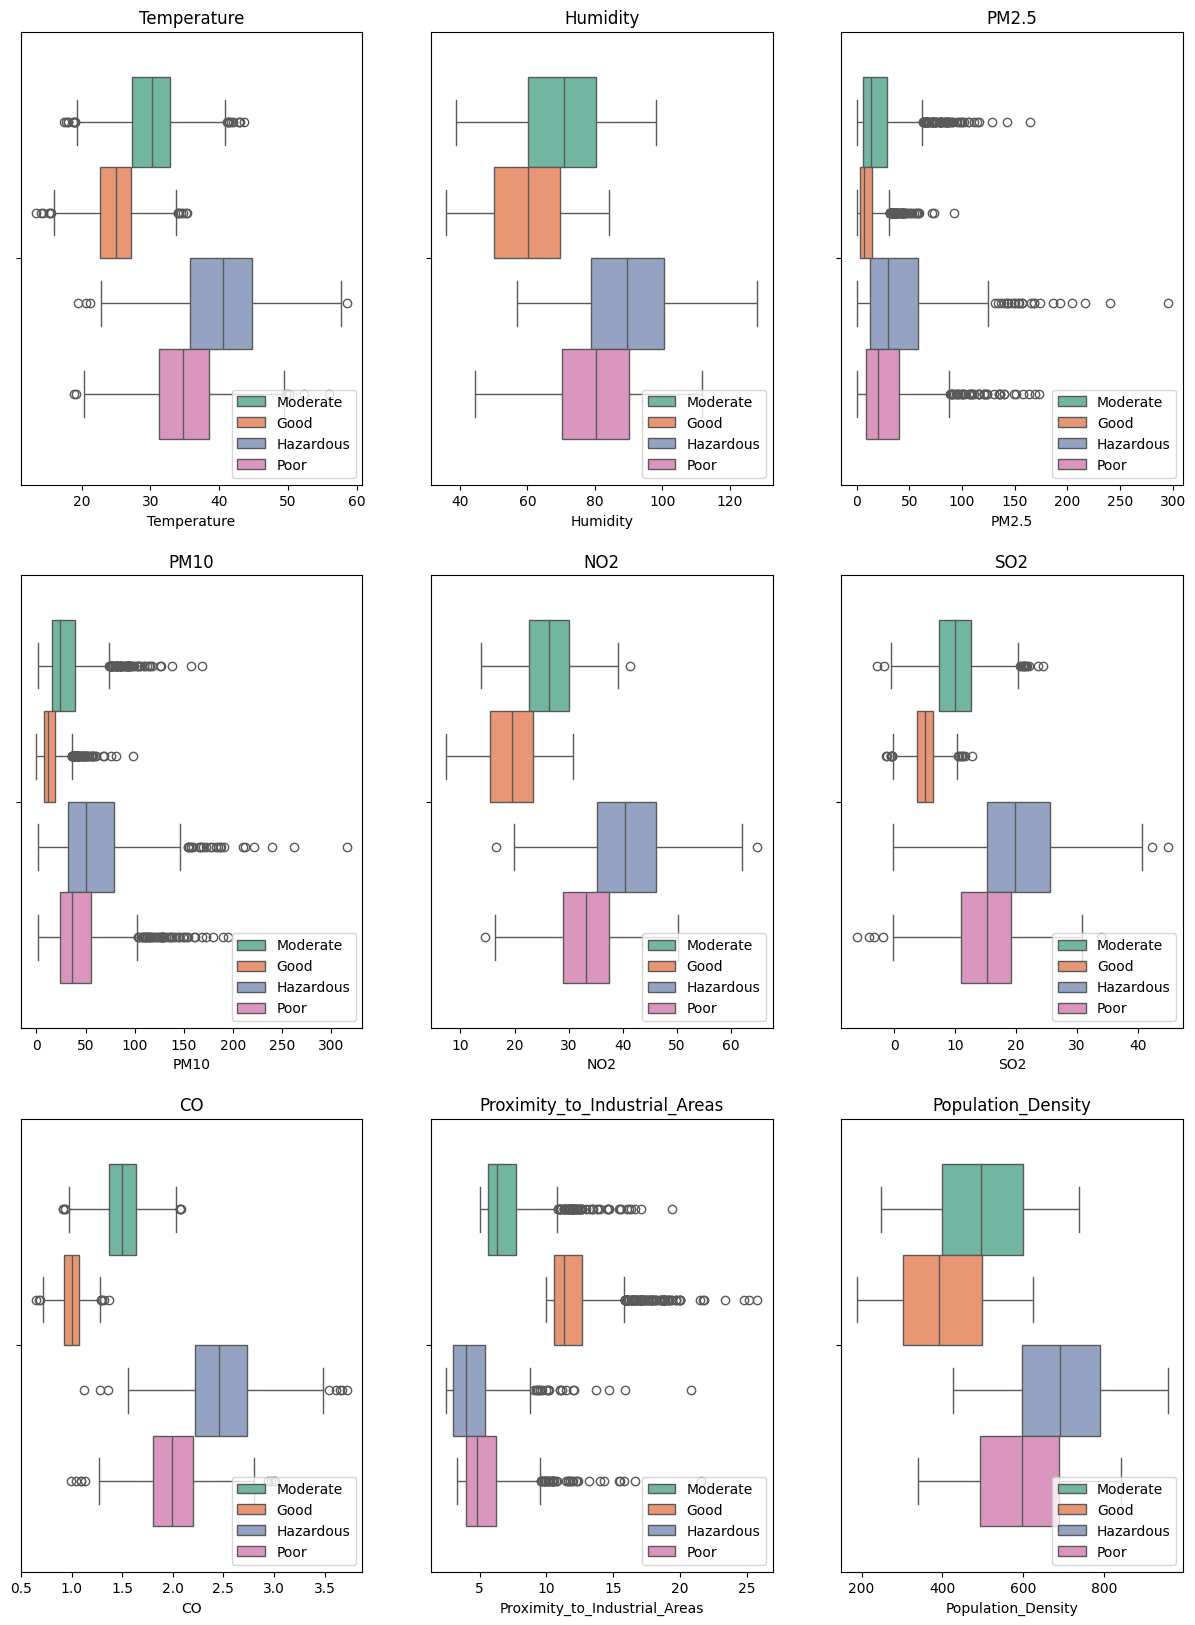

In [14]:
fig = plt.figure(figsize=(15,20))
for i, col in enumerate(df.drop('Air Quality', axis=1).columns):
  plt.subplot(3,3,i+1)
  seaborn.boxplot(x = df[col],hue=encoder.inverse_transform(df['Air Quality']),palette='Set2')
  plt.legend(loc='lower right')
  plt.title(col)

#### Outlier removal

In [15]:
for col in df.columns:
    Q1=np.quantile(df[col],0.25)
    Q3=np.quantile(df[col],0.75)
    IQR=Q3-Q1
    low_lim=Q1-IQR*1.5
    up_lim=Q3+IQR*1.5
    df=df[(df[col]>=low_lim)&(df[col]<=up_lim)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB


In [16]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
count,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000
mean,28.624291,67.458923,13.477321,22.153054,24.444877,8.417629,1.358680,9.002646,469.990620,1.194565
std,5.638813,14.604439,12.096149,14.047948,7.418979,5.023425,0.423952,3.419490,139.874008,1.202555
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,24.500000,56.100000,3.900000,11.100000,19.000000,4.700000,1.010000,5.800000,362.000000,0.000000
50%,27.800000,67.500000,9.800000,18.600000,23.900000,7.100000,1.235000,10.100000,470.000000,2.000000
75%,32.100000,77.700000,19.600000,30.300000,29.100000,11.400000,1.650000,11.300000,573.000000,2.000000
max,47.300000,111.800000,56.600000,63.700000,46.700000,23.200000,2.630000,19.400000,861.000000,3.000000


### Baseline Classification Model

In [48]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

features,target=df.drop('Air Quality',axis=1),df['Air Quality']
features_train,features_test,target_train,target_test=train_test_split(features,target,random_state=0,stratify=target)
dummy=DummyClassifier(strategy='stratified',random_state=0)
target_predicted=dummy.fit(features_train,target_train).predict(features_test)
#dummy.predict(features_test)
dummy.score(features_test,target_test)

0.3942307692307692

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold

standazier=StandardScaler()

pipeline=make_pipeline(dummy)
kf=KFold(n_splits=10,shuffle=True,random_state=1)
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
cv_results_kf=cross_val_score(pipeline,features,target,cv=kf,scoring='accuracy',n_jobs=-1)
cv_results_skf=cross_val_score(pipeline,features,target,cv=skf,scoring='accuracy',n_jobs=-1)
print(cv_results_kf)
print(cv_results_kf.mean())
print(cv_results_skf)
print(cv_results_skf.mean())


[0.35336538 0.37019231 0.36538462 0.37019231 0.38221154 0.35576923
 0.39423077 0.37740385 0.38313253 0.39036145]
0.37422439759036147
[0.34615385 0.39182692 0.35576923 0.37740385 0.37019231 0.39423077
 0.375      0.33173077 0.3686747  0.37108434]
0.368206672845227


In [3]:
createConfusionMatrix(target_test,target_predicted)

NameError: name 'target_test' is not defined

In [2]:
from sklearn.metrics import confusion_matrix

def createConfusionMatrix(target_test,target_predicted):
    matrix = confusion_matrix(np.asarray(target_test),np.asarray(target_predicted))
    class_names=encoder.inverse_transform([0,1,2,3])
    dataframe=pd.DataFrame(matrix,index=class_names,columns=class_names)
    seaborn.heatmap(data=dataframe,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    plt.title("Confusion Matrix"),plt.tight_layout()
    plt.ylabel("True class"), plt.xlabel("Predicted class")
    plt.show()

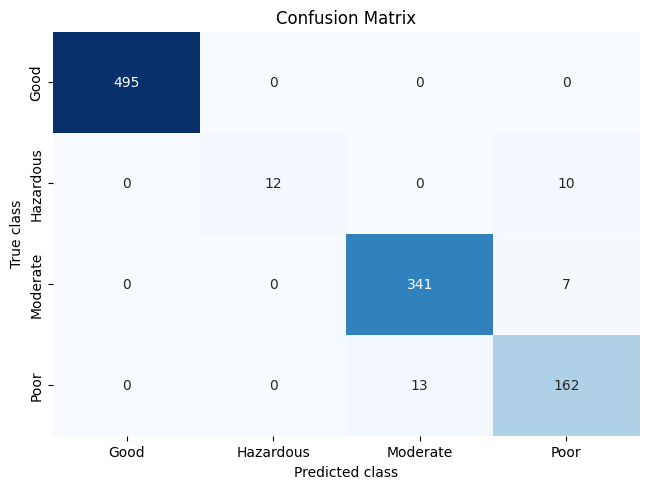

1257


In [79]:
from sklearn.ensemble import RandomForestClassifier
randomForest=RandomForestClassifier()
t= randomForest.fit(features_train,target_train).predict(features_test)
randomForest.score(features_test,target_test)
createConfusionMatrix(target_test,t)
print(t.sum())

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,KFold,cross_val_score

standazier=StandardScaler()

pipeline=make_pipeline(randomForest)
kf=KFold(n_splits=10,shuffle=True,random_state=1)
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
cv_results_kf=cross_val_score(pipeline,features,target,cv=kf,scoring='accuracy',n_jobs=-1)
cv_results_skf=cross_val_score(pipeline,features,target,cv=skf,scoring='accuracy',n_jobs=-1)
print(cv_results_kf)
print(cv_results_kf.mean())
print(cv_results_skf)
print(cv_results_skf.mean())

[0.96875    0.96153846 0.96634615 0.95432692 0.94951923 0.96875
 0.96875    0.98076923 0.95903614 0.96144578]
0.9639231927710844
[0.96153846 0.97355769 0.95192308 0.96153846 0.96153846 0.97596154
 0.97836538 0.95913462 0.97831325 0.9686747 ]
0.9670545644114921


### Model - Random Forest

In [19]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='Air Quality')
y=df['Air Quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),
        'min_samples_leaf':list(np.arange(2,41)),'max_features':['sqrt','log2',None],'n_estimators':[400]}

nrf=RandomizedSearchCV(rf,param_distributions=params,random_state=20,cv=10,scoring='accuracy',n_jobs=-1)
nrf.fit(x_train,y_train)
print(nrf.best_params_)
print(nrf.best_score_)

nrf=nrf.best_estimator_

KeyboardInterrupt: 

In [70]:
predt=nrf.predict(x_train)
pred=nrf.predict(x_test)

# Nastavak 

In [71]:
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
df_minmax=df.copy()
for col in df.columns:
    if df[col].dtypes!=object:
        df_minmax[col]=minmax_scale.fit_transform(df[col].values.reshape(-1,1))
print(df_minmax.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.483776  0.304749  0.091873  0.283255  0.292621  0.523810  0.540404   
1     0.439528  0.522427  0.040636  0.194053  0.595420  0.540816  0.500000   
2     0.286136  0.510554  0.471731  0.532081  0.432570  0.639456  0.494949   
3     0.404130  0.040897  0.107774  0.101721  0.155216  0.391156  0.252525   
4     0.386431  0.457784  0.121908  0.253521  0.368957  0.401361  0.181818   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                       0.224852            0.194651     0.666667  
1                       0.207101            0.628529     0.666667  
2                       0.159763            0.640416     0.666667  
3                       0.508876            0.539376     0.000000  
4                       0.603550            0.170877     0.000000  


In [72]:
scaller=preprocessing.StandardScaler()
df_std=df.copy()
for col in df.columns:
    if df[col].dtypes!=object:
        df_std[col]=scaller.fit_transform(df[col].values.reshape(-1,1))
print(df_std.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.208528 -0.572424 -0.684376 -0.302789 -0.747481  0.155763  0.852370   
1    -0.057517  0.557506 -0.924151 -0.708591  0.856706  0.255309  0.663646   
2    -0.979808  0.495873  1.093263  0.829185 -0.006050  0.832674  0.640056   
3    -0.270354 -1.942035 -0.609963 -1.128632 -1.475431 -0.620693 -0.492284   
4    -0.376772  0.221951 -0.543819 -0.438056 -0.343064 -0.560965 -0.822550   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                      -0.790460           -1.079606     0.669851  
1                      -0.878203            1.008238     0.669851  
2                      -1.112184            1.065440     0.669851  
3                       0.613427            0.579229    -0.993475  
4                       1.081389           -1.194008    -0.993475  
